In [12]:
from fastai.vision import *
from fastai.metrics import error_rate


In [11]:
!pip install fastai


     |████████████████████████████████| 239 kB 29 kB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 44 kB/s eta 0:00:01
Processing /Users/siddharth/Library/Caches/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7/nvidia_ml_py3-7.352.0-cp37-none-any.whl
  Using cached pynvx-1.0.0-cp37-cp37m-macosx_10_7_x86_64.whl (118 kB)
     |████████████████████████████████| 2.2 MB 28 kB/s eta 0:00:01
     |████████████████████████████████| 182 kB 23 kB/s eta 0:00:01
  Using cached murmurhash-1.0.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (34 kB)
     |████████████████████████████████| 211 kB 11 kB/s eta 0:00:013
     |████████████████████████████████| 54 kB 21 kB/s eta 0:00:015
     |████████████████████████████████| 4.0 MB 26 kB/s eta 0:00:01


In [24]:
mypath='/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/'
from os import listdir
from os.path import isfile, join
images = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [36]:
non_food=[mypath+i for i in non_food]

In [31]:
food=[i for i in images if i[0]=='1']

In [32]:
non_food=[i for i in images if i[0]=='0']

In [61]:
import pandas as pd 
  
# list of strings 
# Calling DataFrame constructor on list 
df = pd.DataFrame(food+non_food) 


In [62]:
df['label']=1

In [63]:
df['label']=1

In [64]:
df['label'][1500:]=0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df=df.rename(columns={0: 'name'})

In [80]:
df.to_csv('/Users/siddharth/Downloads/study/labels.csv')

In [82]:
mypathpath='/Users/siddharth/Downloads/study'
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_csv(mypath, ds_tfms=tfms, size=28)


/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/1_387.jpg, /Users/siddharth/Downloads/study/Food-5K/Food-5K/training/1_1465.jpg, /Users/siddharth/Downloads/study/Food-5K/Food-5K/training/0_19.jpg, /Users/siddharth/Downloads/study/Food-5K/Food-5K/training/1_882.jpg, /Users/siddharth/Downloads/study/Food-5K/Food-5K/training/0_1053.jpg...
  if getattr(ds, 'warn', False): warn(ds.warn)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/0'

In [84]:
help(untar_data)


Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [86]:
path = '/Users/siddharth/Downloads/study/Food-5K/Food-5K/training'


In [88]:
from pathlib import Path

In [90]:
path=Path(path)

In [92]:
path_img=path

In [93]:
fnames = get_image_files(path_img)


In [94]:
fnames[:5]


[PosixPath('/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/0_358.jpg'),
 PosixPath('/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/1_639.jpg'),
 PosixPath('/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/0_402.jpg'),
 PosixPath('/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/1_611.jpg'),
 PosixPath('/Users/siddharth/Downloads/study/Food-5K/Food-5K/training/1_177.jpg')]

In [95]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [97]:
bs=16
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [98]:
data

ImageDataBunch;

Train: LabelList (2400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,1,0
Path: /Users/siddharth/Downloads/study/Food-5K/Food-5K/training;

Valid: LabelList (600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,1
Path: /Users/siddharth/Downloads/study/Food-5K/Food-5K/training;

Test: None

In [100]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

In [102]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/siddharth/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [103]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [104]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.182952,0.123543,0.028333,13:54
1,0.170329,0.082843,0.023333,13:15
2,0.111833,0.050920,0.015000,13:20
3,0.062950,0.044840,0.020000,13:36


In [105]:
learn.save('stage-1')


In [106]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

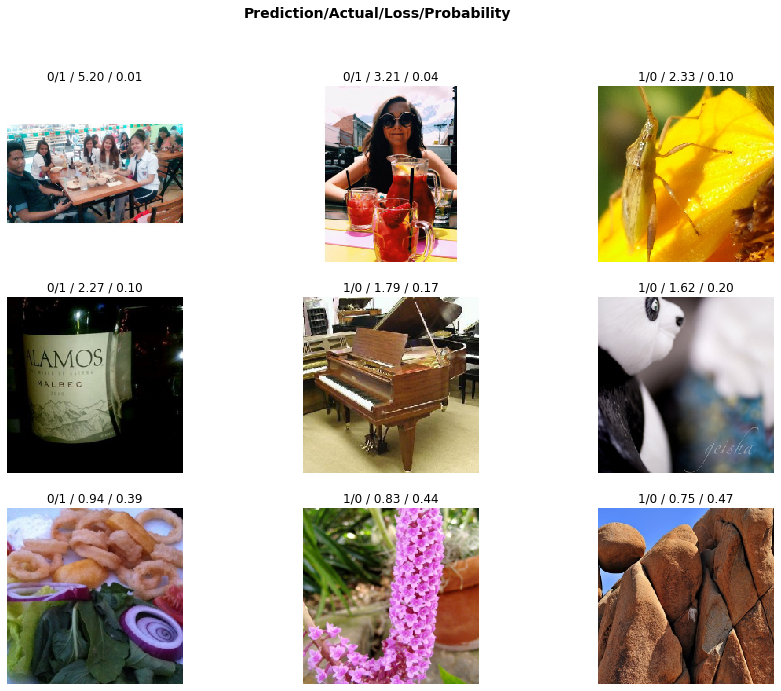

In [107]:
interp.plot_top_losses(9, figsize=(15,11))


In [119]:
img = data.train_ds[0][0]


In [157]:
img=data.train_ds[2005][0]

In [191]:
learn.predict(img)

(Category tensor(1), tensor(1), tensor([1.1923e-05, 9.9999e-01]))

In [190]:
img = open_image('/Volumes/Data/images/recipes/5d36cc1fec1fbfdc4f9f8da9/images/optimized.jpg')

In [175]:
pred_path='/Volumes/Data/images/recipes'

In [185]:
path=Path(pred_path)

In [181]:
fnames = get_image_files(path)

In [187]:
path.ls()

[PosixPath('/Volumes/Data/images/recipes/.DS_Store'),
 PosixPath('/Volumes/Data/images/recipes/1278'),
 PosixPath('/Volumes/Data/images/recipes/1279'),
 PosixPath('/Volumes/Data/images/recipes/1280'),
 PosixPath('/Volumes/Data/images/recipes/1286'),
 PosixPath('/Volumes/Data/images/recipes/1288'),
 PosixPath('/Volumes/Data/images/recipes/1291'),
 PosixPath('/Volumes/Data/images/recipes/1292'),
 PosixPath('/Volumes/Data/images/recipes/1296'),
 PosixPath('/Volumes/Data/images/recipes/1301'),
 PosixPath('/Volumes/Data/images/recipes/1307'),
 PosixPath('/Volumes/Data/images/recipes/1308'),
 PosixPath('/Volumes/Data/images/recipes/1309'),
 PosixPath('/Volumes/Data/images/recipes/1311'),
 PosixPath('/Volumes/Data/images/recipes/1314'),
 PosixPath('/Volumes/Data/images/recipes/1315'),
 PosixPath('/Volumes/Data/images/recipes/1318'),
 PosixPath('/Volumes/Data/images/recipes/1320'),
 PosixPath('/Volumes/Data/images/recipes/1323'),
 PosixPath('/Volumes/Data/images/recipes/1324'),
 PosixPath('/Vo